# Oefening Boost convertor

## opgave

Het onderstaande schema beschikbaar op het [internet](https://www.analog.com/media/en/technical-documentation/data-sheets/1680fa.pdf). De ingangsspanning is 12V en de uitgangsspanning is 48V. De voorwaartse spanning over [D1](https://www.onsemi.com/pdf/datasheet/mbr20100ct-d.pdf) is typisch 0.45V en de aan weerstand van [M1](https://www.vishay.com/docs/91291/91291.pdf) is typisch 0.028 $\Omega$. De weerstand van het spoel L1 is verwaarloosbaar klein ten opzichte van de weerstand $R_{SENSE}$ (zie schema) die wel moet meegerekend worden.

1. Wat is de duty cycle als er een verwaarloosbare stroom aan de uitgang loopt?
2. Bereken de duty cycle D als een functie van de stroom $I_L$
3. Bereken de duty cycle D als een functie van de stroom $I_{out}$. Hier bekijken we enkel de duty cycle waarbij een stabiele waarde van de stroom wordt bekomen.
4. Bereken de efficientie als een functie van de stroom $I_{out}$
5. Bereken de efficientie als een functie van de output Power $P_{out}$. 
6. Hoe verandert deze efficientie als de chip nog bijkomend 22mA uit de 12V voeding verbruikt? 

######  Overzicht
 


```{figure} ./images/StepUp1.png
:name:  bb

Commercieel boost convertor circuit
```

## Oplossing

We berekenen hier eerst de duty cycle als een functie van de stroom die door het spoel loopt ($I_L$).

### Bereken de duty cycle D als een functie van de stroom $I_L$

$$ D \left(V_{in}- (R_L+R_{SENSE}+R_T)I_L\right)+(1-D)\left(V_{in}-V_{D} -(R_L+R_{SENSE})I_L- V_{out} \right) =0 $$

$$ D \left(V_{in}- (R_L+R_{SENSE}+R_T)I_L\right)- D\left(V_{in}-V_{D} -(R_L+R_{SENSE})I_L- V_{out} \right) =V_{out}+V_{D} +(R_L+R_{SENSE})I_L- V_{in} $$

$$ D \left(- (R_T)I_L\right)- D\left(-V_{D} - V_{out} \right) =V_{out}+V_{D} +(R_L+R_{SENSE})I_L- V_{in} $$

$$ D (V_{out}+V_{D} - R_T I_L) =V_{out}+V_{D} +(R_L+R_{SENSE})I_L- V_{in} $$

$$ D  =\frac{V_{out}+V_{D} +(R_L+R_{SENSE})I_L- V_{in} }{(V_{out}+V_{D} - R_T I_L)}$$

$$ D  =\frac{36.45 +0.005 I_L }{48.45 - 0.028 I_L}$$

{numref}`Duty1` toont het verloop van de bekomen Duty Dycle als een functie van de stroom die door het spoel loopt ($I_L$).

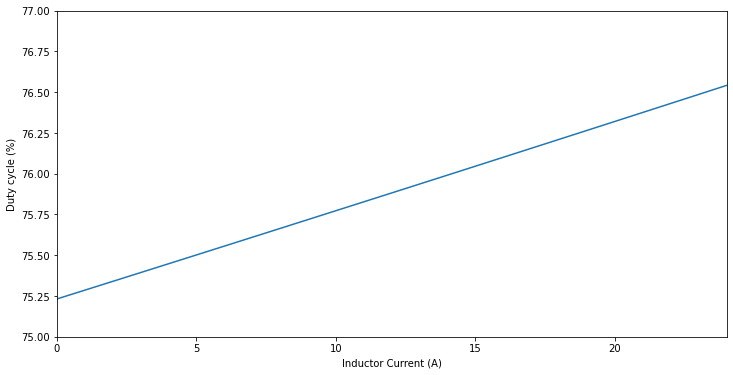

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(12,6))

IL=np.linspace(0,24,50)
ax.plot(IL,100*(36.45 +0.005*IL)/(48.45 - 0.028*IL));

ax.set_xlim(0,24)   
ax.set_ylim(75,77)
ax.set_xlabel(r'Inductor Current (A)')
ax.set_ylabel(r'Duty cycle (%)');

Wanneer we deze grafiek bekijken, lijkt het in dit geval dat we een lineaire benadering kunnen uitvoeren.
$$ D  =\frac{36.45  }{48.45 } \frac{1 +\frac{0.005}{36.45} I_L }{1 - \frac{0.028}{48.45} I_L}$$

Dit doen we door een reeks ontwikkeling van de noemer uit te werken:

$$ D   = \frac{36.45  }{48.45 } \left(1 +\frac{0.005}{36.45} I_L \right)\left(1 + \frac{0.028}{48.45} I_L+ \dots \right)$$

en deze reeks vervolgens te benaderen door de eerste term:

$$ D   \approx \frac{36.45  }{48.45 } \left(1 +\frac{0.005}{36.45} I_L \right)\left(1 + \frac{0.028}{48.45} I_L\right)$$

$$ D   \approx \frac{36.45  }{48.45 } \left(1 +\left(\frac{0.005}{36.45}  + \frac{0.028}{48.45}\right) I_L\right)$$

In [36]:
36.45/48.45,0.005/36.45+0.028/48.45,(1+(0.005/36.45+0.028/48.45)*24)*36.45/48.45

(0.7523219814241486, 0.000715089587925272, 0.7652334442005579)

$$ D   \approx 0.7523 \left(1 +0.000715 I_L\right)$$

### Bereken de duty cycle D als een functie van de stroom $I_{out}$

$$ I_L (1-D)= I_{out}$$

$$ D (V_{out}+V_{D} - R_T I_L) =V_{out}+V_{D} +(R_L+R_{SENSE})I_L- V_{in} $$

$$ D ((1-D)(V_{out}+V_{D}) - R_T I_{out}) =(1-D)(V_{out}+V_{D}- V_{in}) +(R_L+R_{SENSE})I_{out} $$

$$ -(V_{out}+V_{D}) D^2 +(2 V_{out}+2 V_{D} - R_T I_{out}- V_{in})  D  -(V_{out}+V_{D}- V_{in}+(R_L+R_{SENSE})I_{out}) $$


$$D=\frac{-(2 V_{out}+2 V_{D} - R_T I_{out}- V_{in}) +\sqrt{(2 V_{out}+2 V_{D} - R_T I_{out}- V_{in})^2-4(V_{out}+V_{D})(V_{out}+V_{D}- V_{in}+(R_L+R_{SENSE})I_{out})}}{-2(V_{out}+V_{D})} $$



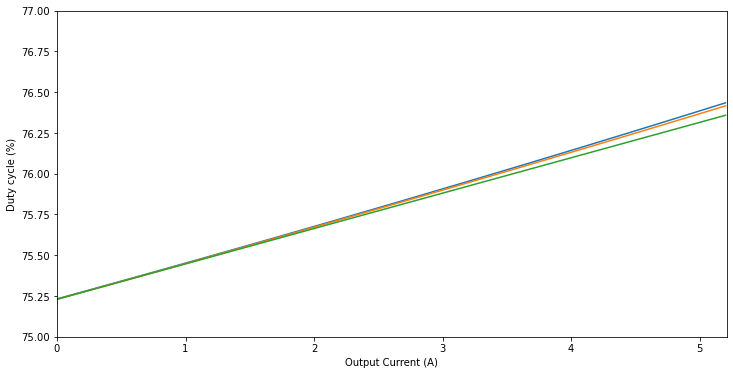

In [51]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(12,6))

Iout=np.linspace(0,5.2,50)
b=2*48+2*0.45-0.028*Iout-12
det=b**2-4*48.45*(36.45+0.005*Iout)
ax.plot(Iout,-100*(-b+np.sqrt(det) )/48.45/2);
#ax.plot(Iout,-(-b-np.sqrt(det) )/48.45/2);
ax.plot(Iout,100*(1.7523 -np.sqrt(1.7523**2-4*(0.7523  +0.0005378945*Iout)))/2)
#ax.plot(Iout,100*(1.7523 +np.sqrt(1.7523**2-4*(0.7523  +0.0005378945*Iout)))/2)
ax.plot(Iout,100*(0.7523+0.00217*Iout))
ax.set_xlim(0,250/48)   
ax.set_ylim(75,77)
ax.set_xlabel(r'Output Current (A)')
ax.set_ylabel(r'Duty cycle (%)');

Aangezien de duty cycle erg lineair was als functie van $I_L$ kunnen we dit ook als basis nemen voor de verdere berekening van de duty cycle als functie van de $I_{out}$


$$ D   \approx 0.7523 \left(1 +0.000715 I_L\right)$$

$$ D   \approx 0.7523 \left(1 +0.000715 \frac{I_{out}}{1-D}\right)$$

$$ D(1-D)= 0.7523 \left(1-D +0.000715 I_{out}\right)$$

$$ D^2 -D + 0.7523 \left(1-D +0.000715 I_{out}\right)=0$$

$$ D^2 -1.7523 D + 0.7523  +0.0005378945 I_{out} \approx 0$$

Opnieuw heeft deze vierkantsvergelijking 2 oplossingen. De berekening met de + levert ons het onstabiele stroompunt op. De correcte benadering vinden we in:

$$D \approx \frac{1.7523 -\sqrt{1.7523^2-4(0.7523  +0.0005378945 I_{out})}}{2} $$

{numref}`Dutyoutput` toont dat zowel de correcte berekening als de benadering weinig van elkaar verschillen.

In [48]:
x1=0.7523  *0.000715
x1

0.0005378945

In [49]:
x2=1.7523**2-4*0.7523
x3=4*x1/x2
x2,x3

(0.06135528999999984, 0.03506752229514367)

In [50]:
(1.7523-np.sqrt(x2))/2,np.sqrt(x2)/2*x3/2

(0.7523000000000002, 0.0021715563181267687)

$$D \approx \frac{1.7523 -\sqrt{0.061355 (1 -0.035 I_{out})}}{2} $$

$$D \approx 0.7523 + 0.00217 I_{out}$$

### Bereken de efficientie als een functie van de stroom $I_{out}$

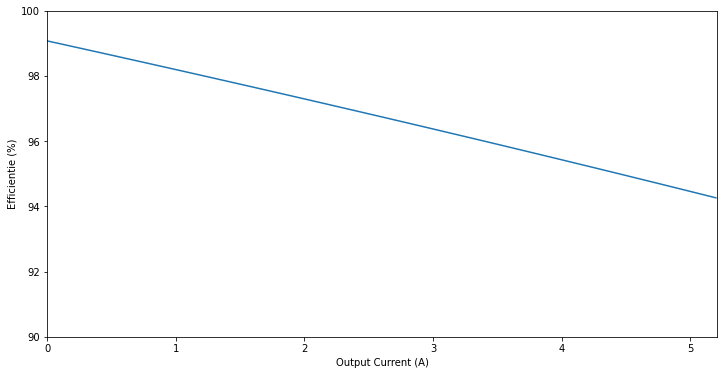

In [23]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(12,6))

Iout=np.linspace(0,5.2,50)
b=2*48+2*0.45-0.028*Iout-12
det=b**2-4*48.45*(36.45+0.005*Iout)
ax.plot(Iout,100*(1+(-b+np.sqrt(det) )/48.45/2)*48/12);
#ax.plot(Iout,-(-b-np.sqrt(det) )/48.45/2);
ax.set_xlim(0,250/48)   
ax.set_ylim(90,100)
ax.set_xlabel(r'Output Current (A)')
ax.set_ylabel(r'Efficientie (%)');

### Bereken de efficientie als een functie van de output Power $P_{out}$

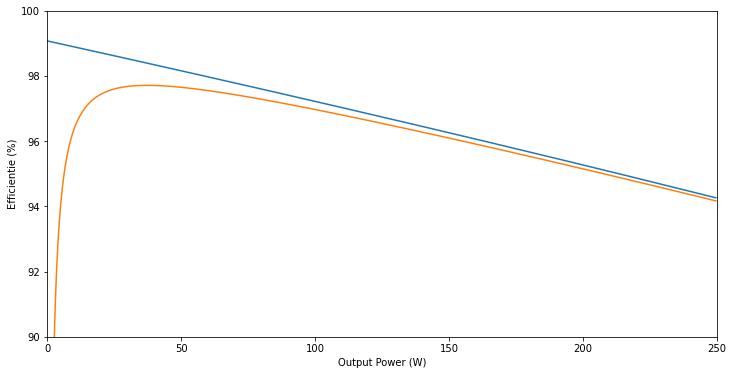

In [21]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(12,6))

Iout=np.linspace(0,5.2,500)
b=2*48+2*0.45-0.028*Iout-12
det=b**2-4*48.45*(36.45+0.005*Iout)
eff=(1+(-b+np.sqrt(det) )/48.45/2)*48/12
ax.plot(Iout*48,100*eff);
Pin=Iout*48/eff+12*0.022
ax.plot(Iout*48,100*Iout*48/Pin);
ax.set_xlim(0,250)   
ax.set_ylim(90,100)
ax.set_xlabel(r'Output Power (W)')
ax.set_ylabel(r'Efficientie (%)');